# D206 Data Cleaning Performance Assessment

Vincent Taylor

## Research Question (1A)

I will be using the customer churn csv file. The research question I wanted to look at for this assignment is "What factors contribute to customer churn?" I believe this is something to consider as there are a multitude of factors that can contribute to churn. Moreover, frequent churn can lead to a decrease in a telecom providers reputation. Lastly by choosing this question it will allow upper level management of the company to use the data to decide when future investments in services and offerings should occur, which would allow the company to remain competitive.

## Describe The Variables (1B)

-This data set has 50 columns and contains obeservations from 10,000 customers.

- CaseOrder (Quantitative), Example 1
This column is a placeholder variable to keep the orignal order of the file.

- Customer_id (Qualitative), Example K409198  
Placeholder variable used to tie other rows to a specific customer.

- Interaction (Qualitative), Example aa90260b-4141-4a24-8e36-b04ce1f4f77b
Unique ID used to categorize a customer transactions, and support.

The six below variables are used to tie back to customers location based on the address they provided in their billing statement.
    - City (Qualitative), Example Point Baker
    - State (Qualitative), Example AK
    - County (Qualitative), Example Prince of Wales-Hyder
    - Zip (Qualitiative),   Example 99927
    - Lat (Quantitative),    Example 56.251
    - Lng (Quantitative),    Example -133.37571

The two items below are based on customer census data.
    - Population (Quantiative),Example 38
    - Area (Qualitiative),     Example Urban


- TimeZone (Qualitative), Example America/Sitka
Provides timezone of a customer based on sign-up information

- Job (Qualitative), Example Environmental Health Practitioner 
Job of a speciifc customer taken from sign-up information

- Children (Quantitative), Example 1
Number of kids reported, taken from sign-up information.

- Age (Quantiative), Example 48
Age of a customer, taken from sign-up information.

- Education (Qualitative), Example Master's degree
Highest degree attained by a customer, taken from sign-up information.

- Employment (Qualitative), Example Employed
Employment status of a customer, taken from sign-up information.

- Income (Quantitative), Example 28561.99
Annual Income reported by customer from sign-up information.

- Marital (Qualitative), Example Married
Marital status of customer, taken from sign-up information.

- Gender (Qualitative), Example Male
Customer sex reported at time of sign-up.

- Churn (Qualitative), Example No
Wether a customer has canceled a service within the last 30 days.

- Outage_sec_perweek (Quantiative), Example 6.972
Average time a customer's service is out in a given week.

- Email (Quantitative), Example 10
Number of emails a customer has sent in the past twelve months.

- Contacts (Quantitative), Example 3
Number of calls a customer has made to customer support.

- Yearly_Equip_failure (Quantitative), Example 4
Number of failures a customer has experienced using equipment.

- Techie (Qualitative), Example Yes
Wether customer considers themselves technically inclined. Taken from sign-up information.

- Contract (Quantitative), Example One year
The length of time a customer has on their contract.


The following items are additional services (yes/no) responses to if a customer has the following items. This would be pulled from in-house data.
- Port_modem (Qualitiative), Example Yes
- Tablet (Qualitative), Example Yes
- InternetService (Qualitative
- Phone (Qualitative) Example Yes
- Multiple (Qualitative) Example Yes
- OnlineSecurity (Qualitative) Example Yes
- OnlineBackup (Qualitative), Example Yes
- DeviceProtection (Qualitative), Example Yes
- TechSupport (Qualitative), Example No
- StreamingTV (Qualitative), Example No
- StreamingMovies (Qualitative), Example No
- PaperlessBilling (Qualitative), Example No

- PaymentMethod (Qualitative), Example Automatic bank transfer
Customers preferred method of payment. pulled from in-house data.

- Tenure (Quantiative), Example 6.79
Amount of time a customer has stayed with telecom provider in months.

- MonthlyCharge (Quantiative), Example $171.99
Monthly amount charged to customer, average per customer but time period is unknown.

- Bandwidth_GB_Year (Quantitative), Example 904.53
Amount of data used in a year by a cusomer in (GB). 

- The 8 columns below represent each response every customer answered to a survey response with 1 being the most importand and 8 being the least important.

    - Item1 Timely response (Qualitative), Example 3
    - Item2 Timely Fixes (Qualitative), Example 4
    - Item3 Timely replacements (Qualitative), Example 5
    - Item4 Reliability (Qualitative), Example 2
    - Item5 Options (Qualitative), Example 2
    - Item6 Respectful Responese (Qualitative), Example 3
    - Item7 Courteous Exchange (Qualitative), Example 3
    - Item8 Evidence of active listening (Qualitative), Example 5

# Part II Data-Cleaning Plan


###### (C1) Assessing quality of data

I will use pandas to first import the CSV file. Once it has been loaded I will run a quick inspection to check the datatypes to make sure that they are consistent. I will also confirm that each column has the same data type. After this has been completed I will check for any spelling mistakes in the columns and then identify outliers using a combination of boxplot graphs and Z-score. For any missing values I will replace the null columns using central tendency. 

###### (C2) Characterstics of data 

The dataset contains both numerical/quantitative (`Contacts`, `Children`) as well as categorical/qualitative (`PaymentMethod`, `Gender`) features. Since some of the columns are self-reported from sign-up information we have no concrete way of verifying outliers or null column data, so we will be using the mean, median or mode to replace null values in quantitative fields and defaulting to no for the qualitative field nulls. The data frame contains 10,000 records and there are 52 columns. 

###### (C3) Justification of Programming Language

I am using Python as opposed to R, due to Python being the most common programming language as well as the ease of use in terms of being able to write customized scripts in order to perform broader analyses of data, as well as the ease of importing packages. I also want to develop good habits of using common industry standard software. I will be using pandas to create a dataframe in to store the CSV. I will also use numpy in order to perform calculations.

In [1]:
# Import Python Libraries for Data Analysis and Statistical Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
import seaborn as sns
from scipy import stats
%matplotlib inline
from pandas import DataFrame

In [2]:
# Loading the churn.csv into dataframe
df = pd.read_csv('./churn_raw_data.csv')

#Checking data types and count of rows per column.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [3]:
df.shape

(10000, 52)

In [4]:
# Checking for duplicate rows in dataframe

#identify duplicate rows
duplicateRows = df[df.duplicated()]

#view duplicate rows
duplicateRows

# No duplicate values were found.
# Code copied from statology will be listed in sources

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


In [5]:
#Visual inspection of the csv file to check for outliers and basic level exploration.
pd.set_option("display.max_columns", None)
df

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,Rural,America/New_York,Sport and exercise psychologist,3.0,NaN,"Some College, Less than 1 Year",Retired,55723.74,Married,Male,No,9.265392,12,2,0,NaN,Month-to-month,Yes,Yes,DSL,NaN,Yes,No,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.828800,6511.253000,3,2,3,3,4,3,2,3
9996,9997,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,Rural,America/Chicago,Consulting civil engineer,4.0,48.0,Regular High School Diploma,Part Time,NaN,Divorced,Male,No,8.115849,15,2,0,NaN,Two Year,No,No,Fiber Optic,NaN,Yes,Yes,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,208.856400,5695.952000,4,5,5,4,4,5,2,5
9997,9998,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,Rural,America/Chicago,IT technical support officer,NaN,NaN,Nursery School to 8th Grade,Full Time,NaN,Never Married,Female,No,4.837696,10,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),NaN,168.220900,4159.306000,4,4,4,4,4,4,4,5
9998,9999,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,30117,33.58016,-85.13241,35575,Urban,America/New_York,Water engineer,1.0,39.0,Bachelor's Degree,Full Time,16667.58,Separated,Male,No,12.076460,14,1,0,No,Two Year,No,Yes,Fiber Optic,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Credit Card (automatic),71.095600,252.

In [6]:
#Checking placeholder variable has 10000 results
df.CaseOrder.value_counts().count()

10000

In [7]:
#Checking customer_id variable has 10000 results
df.Customer_id.value_counts().count()

10000

In [8]:
#Checking Interaction variable has 10000 results
df.Interaction.value_counts().count()

10000

In [9]:
#Verifying column can be changed to categorical data type.
df.Area.value_counts()

Suburban    3346
Urban       3327
Rural       3327
Name: Area, dtype: int64

In [10]:
#Verifying column can be changed to categorical data type.
df.Timezone.value_counts()

America/New_York                  4072
America/Chicago                   3672
America/Los_Angeles                887
America/Denver                     552
America/Detroit                    265
America/Indiana/Indianapolis       186
America/Phoenix                    104
America/Boise                       57
America/Anchorage                   55
America/Puerto_Rico                 40
Pacific/Honolulu                    35
America/Menominee                   16
America/Nome                        12
America/Kentucky/Louisville         10
America/Sitka                        8
America/Indiana/Vincennes            6
America/Indiana/Tell_City            6
America/Toronto                      5
America/Indiana/Petersburg           4
America/Juneau                       2
America/North_Dakota/New_Salem       2
America/Indiana/Knox                 1
America/Indiana/Winamac              1
America/Indiana/Marengo              1
America/Ojinaga                      1
Name: Timezone, dtype: in

In [11]:
#Verifying column can be changed to categorical data type.
df.Education.value_counts()

Regular High School Diploma                 2421
Bachelor's Degree                           1703
Some College, 1 or More Years, No Degree    1562
9th Grade to 12th Grade, No Diploma          870
Master's Degree                              764
Associate's Degree                           760
Some College, Less than 1 Year               652
Nursery School to 8th Grade                  449
GED or Alternative Credential                387
Professional School Degree                   198
No Schooling Completed                       118
Doctorate Degree                             116
Name: Education, dtype: int64

In [12]:
#Verifying column can be changed to categorical data type.
df.Employment.value_counts()

Full Time     5992
Part Time     1042
Retired       1011
Unemployed     991
Student        964
Name: Employment, dtype: int64

In [13]:
#Verifying column can be changed to categorical data type.
df.Gender.value_counts()

Female                  5025
Male                    4744
Prefer not to answer     231
Name: Gender, dtype: int64

In [14]:
#Verifying column can be changed to categorical data type.
df.Marital.value_counts()

Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64

In [15]:
#Detecting total count of null values in dataset.
df.isnull().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

In [16]:
#summary stats to detect outliers 
with pd.option_context('display.max_columns', 35):
    print(df.describe(include = [np.number]))
    pd.reset_option('display.max_columns')

        Unnamed: 0    CaseOrder           Zip           Lat           Lng  \
count  10000.00000  10000.00000  10000.000000  10000.000000  10000.000000   
mean    5000.50000   5000.50000  49153.319600     38.757567    -90.782536   
std     2886.89568   2886.89568  27532.196108      5.437389     15.156142   
min        1.00000      1.00000    601.000000     17.966120   -171.688150   
25%     2500.75000   2500.75000  26292.500000     35.341828    -97.082812   
50%     5000.50000   5000.50000  48869.500000     39.395800    -87.918800   
75%     7500.25000   7500.25000  71866.500000     42.106908    -80.088745   
max    10000.00000  10000.00000  99929.000000     70.640660    -65.667850   

          Population     Children          Age         Income  \
count   10000.000000  7505.000000  7525.000000    7510.000000   
mean     9756.562400     2.095936    53.275748   39936.762226   
std     14432.698671     2.154758    20.753928   28358.469482   
min         0.000000     0.000000    18.000000

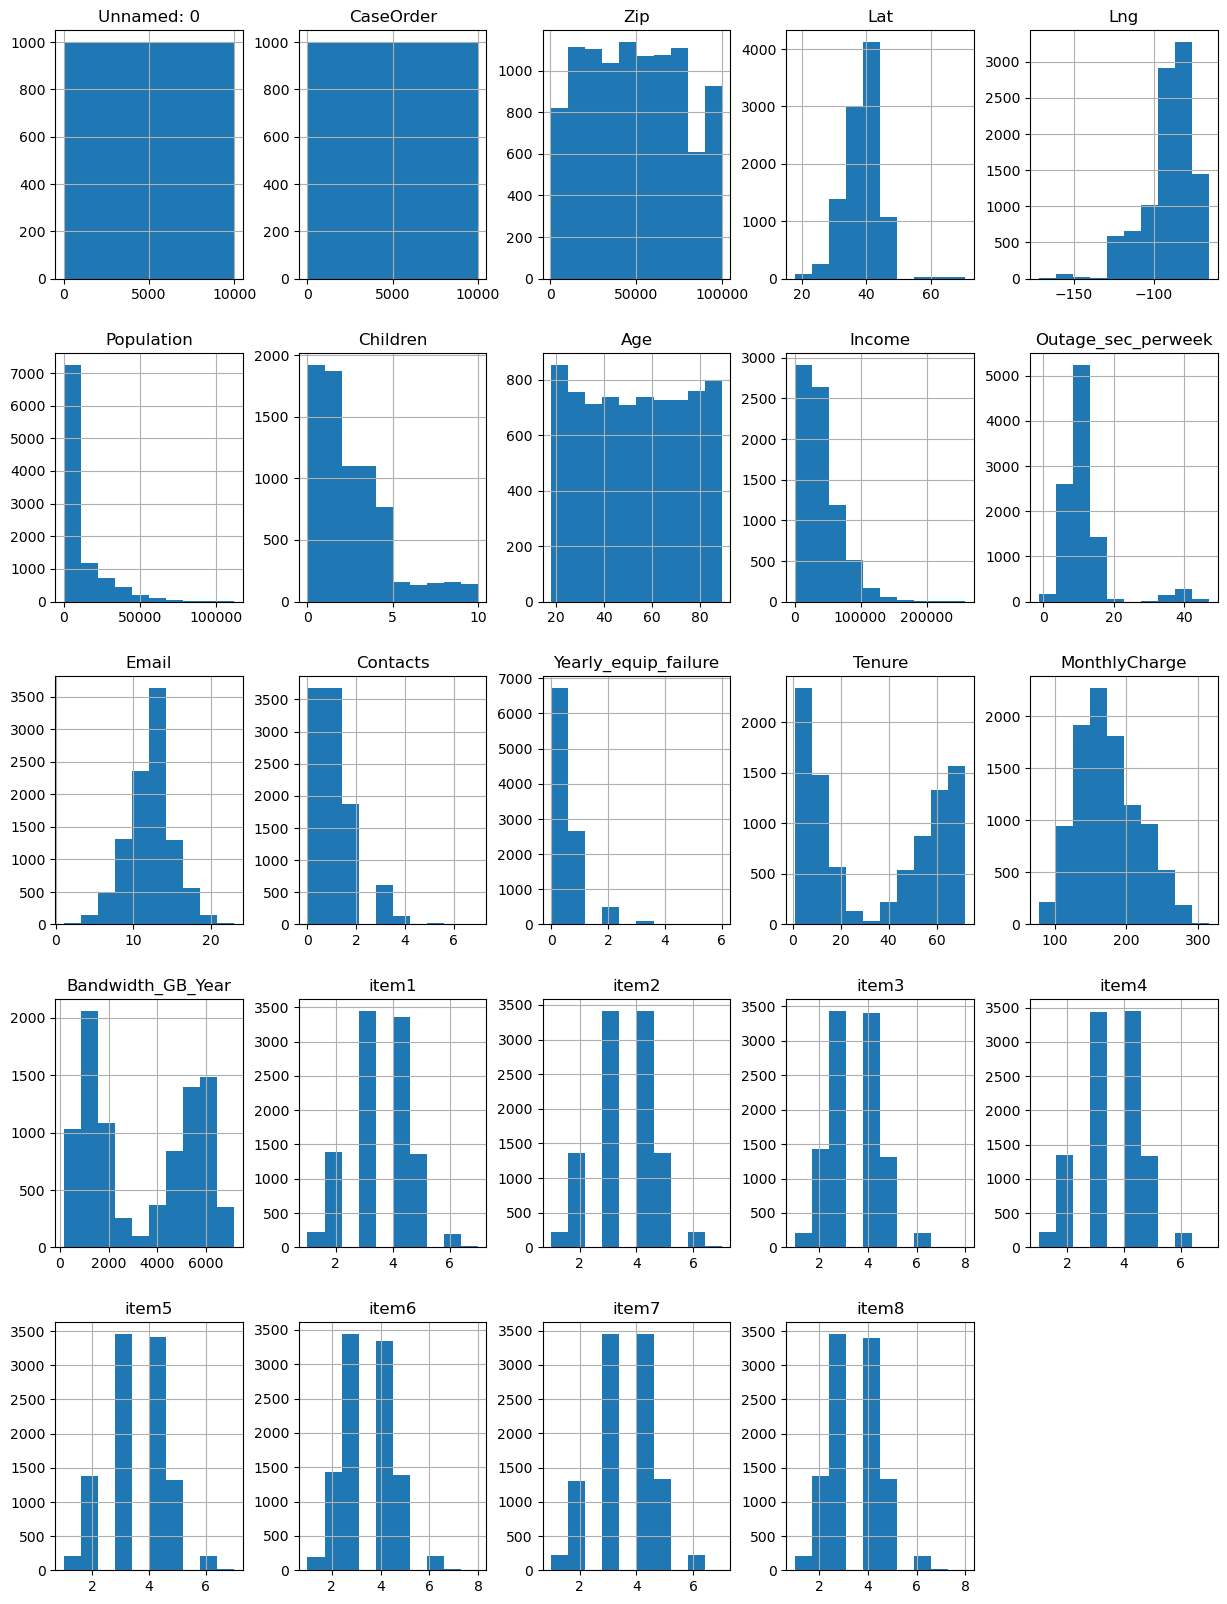

In [17]:
#Basic data visualization (Histogram)
df.hist(figsize=(15,20));

# Basic Observations
- `Unamed: 0` should be dropped as `CaseOrder`should be the index.
-  The survey items are not descript.
-  Columns need to be changed to proper Python casing.
-`zip` is also missing characters, and will need to be filled in with placeholders in order to make the data consistent.
-`multiple` needs to be more descriptive.
-`zip`,`lat`,`lng` can be changed to a string.
- `children`, `age`, `income`, `techie`,`phone`, `tenure`,  `tech_support`,  and `bandwith_gb_year` all have counts <10000.
-`item1`-`item8` data type can be changed to categorical.

In [18]:
# Dropping the 'Unamed 0 column'
df = df.drop(columns='Unnamed: 0')

# Confirm the column was removed 
print(df.shape)

(10000, 51)


In [19]:
#renaming columns to python casing.
col_head = {
    'CaseOrder': 'case_order',
    'Customer_id': 'customer_id',
    'Interaction': 'interaction',
    'City': 'city',
    'State': 'state',
    'County': 'county',
    'Zip': 'zip',
    'Lat': 'lat',
    'Lng': 'lng',
    'Population': 'population',  
    'Area': 'area',  
    'Timezone': 'timezone',
    'Job': 'job',
    'Children': 'children',
    'Age': 'age', 
    'Education': 'education',
    'Employment': 'employment_type',
    'Income': 'income',  
    'Marital': 'marital_type',
    'Gender': 'gender',
    'Churn': 'churn',
    'Outage_sec_perweek': 'outage_sec_perweek',
    'Email': 'email',
    'Contacts': 'contacts',
    'Yearly_equip_failure': 'yearly_equip_failure',
    'Techie': 'techie',
    'Contract': 'contract',
    'Port_modem': 'port_modem',
    'Tablet': 'tablet',
    'InternetService': 'internet_service',
    'Phone': 'phone',
    'Multiple': 'multiple_lines',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'Tenure': 'tenure',
    'MonthlyCharge': 'monthly_charge',
    'Bandwidth_GB_Year': 'bandwidth_gb_year',
    'item1': 'timely_response',
    'item2': 'timely_fixes',
    'item3': 'timely_replacements',
    'item4': 'reliability',
    'item5': 'options',
    'item6': 'respectful_response',
    'item7': 'courteous_exchange',
    'item8': 'active_listening'}

df.rename(columns=col_head, inplace=True)

In [20]:
# Review unique values in `area` column
df['area'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [21]:
# Review unique values in `timezone` column
df['timezone'].unique()

array(['America/Sitka', 'America/Detroit', 'America/Los_Angeles',
       'America/Chicago', 'America/New_York', 'America/Puerto_Rico',
       'America/Denver', 'America/Menominee', 'America/Phoenix',
       'America/Indiana/Indianapolis', 'America/Boise',
       'America/Kentucky/Louisville', 'Pacific/Honolulu',
       'America/Indiana/Petersburg', 'America/Nome', 'America/Anchorage',
       'America/Indiana/Knox', 'America/Juneau', 'America/Toronto',
       'America/Indiana/Winamac', 'America/Indiana/Vincennes',
       'America/North_Dakota/New_Salem', 'America/Indiana/Tell_City',
       'America/Indiana/Marengo', 'America/Ojinaga'], dtype=object)

In [22]:
# Review unique values in `marital` column
df['marital_type'].unique()

array(['Widowed', 'Married', 'Separated', 'Never Married', 'Divorced'],
      dtype=object)

In [23]:
# Review unique values in `payment_method` column
df['payment_method'].unique()

array(['Credit Card (automatic)', 'Bank Transfer(automatic)',
       'Mailed Check', 'Electronic Check'], dtype=object)

In [24]:
# Review unique values in `education` column
df['education'].unique()

array(["Master's Degree", 'Regular High School Diploma',
       'Doctorate Degree', 'No Schooling Completed', "Associate's Degree",
       "Bachelor's Degree", 'Some College, Less than 1 Year',
       'GED or Alternative Credential',
       'Some College, 1 or More Years, No Degree',
       '9th Grade to 12th Grade, No Diploma',
       'Nursery School to 8th Grade', 'Professional School Degree'],
      dtype=object)

In [25]:
#Reexpressing the values of education as numeric. Table 3.1 pg 37

dict_edu = {"education": {
     "No Schooling Completed": 0,
     "Nursery School to 8th Grade": 8,
     "9th Grade to 12th Grade, No Diploma": 11,
     "Regular High School Diploma": 12,
     "GED or Alternative Credential": 12,
     "Some College, Less than 1 Year": 12,
     "Some College, 1 or More Years, No Degree": 12,
     "Associate's Degree": 14,
     "Bachelor's Degree": 16,
     "Master's Degree": 18,
     "Professional School Degree":18,
     "Doctorate Degree": 20,
}}

In [26]:
# Replace original value with new value. Variable's original value: Variable's new value
df.replace(dict_edu, inplace = True)

In [27]:
#Reexpressing the values of payment method to be more concise.

dict_pay = {"payment_method": {
     "Credit Card (automatic)": "Autopay",
     "Bank Transfer(automatic)": "Autopay",
     "Electronic Check": "eCheck",
     "Mailed Check": "Check",
}}

In [28]:
# Replace original value with new value. Variable's original value: Variable's new value
df.replace(dict_pay, inplace = True)

In [29]:
#Reexpressing the values of gender to be more concise.

dict_gen = {"gender": {
     "Male": "M",
     "Female": "F",
     "Prefer not to say": "NB",
}}

In [30]:
# Replace original value with new value. Variable's original value: Variable's new value
df.replace(dict_gen, inplace = True)

In [31]:
#Reexpressing the values of marital to be more concise.

dict_mar = {"marital_type": {
     "Never Married": "Single",
}}

In [32]:
# Replace original value with new value. Variable's original value: Variable's new value
df.replace(dict_mar, inplace = True)

In [33]:
#Updating timezones to standard timezones recognized by US.
dict_time = {"timezone": {
    "America/Puerto_Rico": "US/Atlantic",
    "America/Anchorage": "US/Alaska",
    "America/Juneau": "US/Alaska",
    "America/Nome": "US/Alaska",
    "America/Sitka": "US/Alaska",
    "America/Chicago": "US/Central",
    "America/Indiana/Knox": "US/Central",
    "America/Indiana/Marengo": "US/Central",
    "America/Indiana/Tell_City": "US/Central",
    "America/Menominee": "US/Central",
    "America/North_Dakota/Beulah": "US/Central",
    "America/North_Dakota/New_Salem": "US/Central",
    "America/Ojinaga": "US/Central",
    "America/Detroit": "US/Eastern",
    "America/Indiana/Indianapolis": "US/Eastern",
    "America/Indiana/Marengo": "US/Eastern",
    "America/Indiana/Petersburg": "US/Eastern",
    "America/Indiana/Vincennes": "US/Eastern",
    "America/Indiana/Winamac": "US/Eastern",
    "America/Kentucky/Louisville": "US/Eastern",
    "America/New_York": "US/Eastern",
    "America/Toronto": "US/Eastern",
    "Pacific/Honolulu": "US/Hawaii",
    "America/Boise": "US/Mountain",
    "America/Denver": "US/Mountain",
    "America/Phoenix": "US/Mountain",
    "America/Los_Angeles": "US/Pacific"
}}

In [34]:
# Replace original value with new value. Variable's original value: Variable's new value
df.replace(dict_time, inplace = True)

In [35]:
#Displaying data with new values
df.head()

,case_order,customer_id,interaction,city,state,county,zip,lat,lng,population,area,timezone,job,children,age,education,employment_type,income,marital_type,gender,churn,outage_sec_perweek,email,contacts,yearly_equip_failure,techie,contract,port_modem,tablet,internet_service,phone,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,payment_method,tenure,monthly_charge,bandwidth_gb_year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,US/Alaska,Environmental health practitioner,NaN,68.0,18,Part Time,28561.99,Widowed,M,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Autopay,6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,US/Eastern,"Programmer, multimedia",1.0,27.0,12,Retired,21704.77,Married,F,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Autopay,1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,US/Pacific,Chief Financial Officer,4.0,50.0,12,Student,NaN,Widowed,F,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Autopay,15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,US/Pacific,Solicitor,1.0,48.0,20,Retired,18925.23,Married,M,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,US/Central,Medical illustrator,0.0,83.0,18,Student,40074.19,Separated,M,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


In [36]:
#Changing Null values to no
category_nulls = ['techie', 'phone','tech_support']
for col in category_nulls:
    df[col].fillna('No', inplace=True)
    
#Verifying change was made
    print(df[col].value_counts(), len(df[col]))

No     8743
Yes    1257
Name: techie, dtype: int64 10000
Yes    8128
No     1872
Name: phone, dtype: int64 10000
No     6626
Yes    3374
Name: tech_support, dtype: int64 10000


In [37]:
#Filling blanks in children Values with 0
df.children.fillna(0, inplace = True)

In [38]:
#Detecting total count of null values in age column.
df['age'].isnull().sum()

2475

In [39]:
#Filling blanks in age column with median values
age_median = round(df['age'].median())
df['age'].fillna(age_median, inplace = True)
df['age'] = df['age'].astype('Int64')

#checking count of values for age
df.age.value_counts()

53    2568
55     128
41     122
77     121
57     120
      ... 
78      92
87      92
59      92
18      90
47      87
Name: age, Length: 72, dtype: Int64

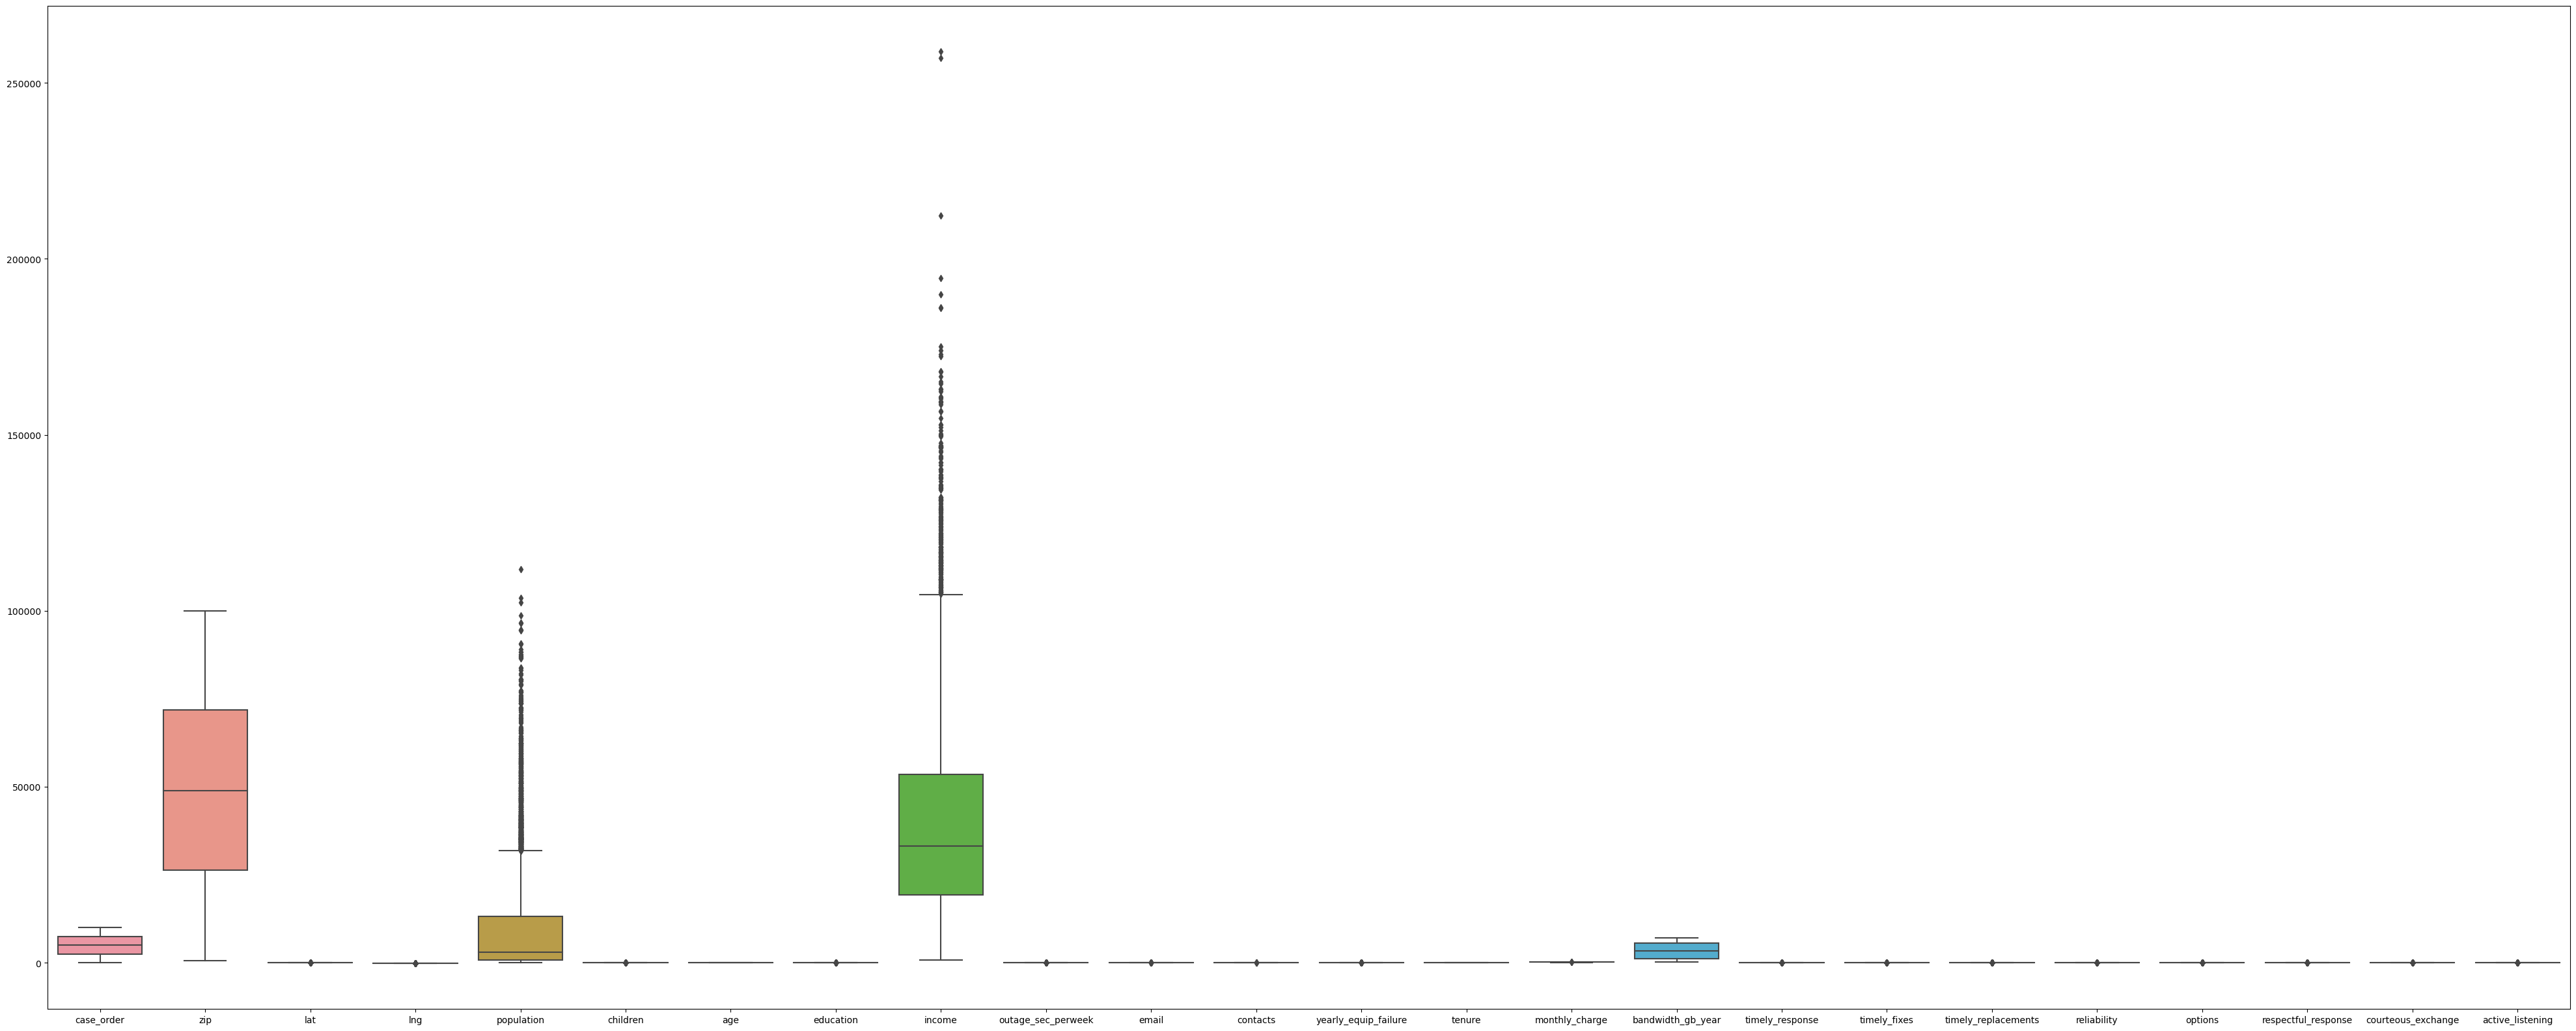

In [40]:
#Creating boxplot to visualize outliers
plt.figure(figsize=(50, 20))
sns.boxplot(data=df)
plt.show()

In [41]:
#Detecting total count of null values in income column.
df['income'].isnull().sum()

2490

In [42]:
#Filling blanks in income column with median values
inc_median = round(df['income'].median())
df['income'].fillna(inc_median, inplace = True)
df['income'] = df['income'].astype('int')
df['income'] = df['income'].round(0)

#checking count of values for age
df.income.value_counts()

33187    2490
38691       3
36171       3
33004       3
55474       3
         ... 
51784       1
81902       1
28284       1
64916       1
16667       1
Name: income, Length: 7172, dtype: int64

Text(0.5, 1.0, 'Income Histogram')

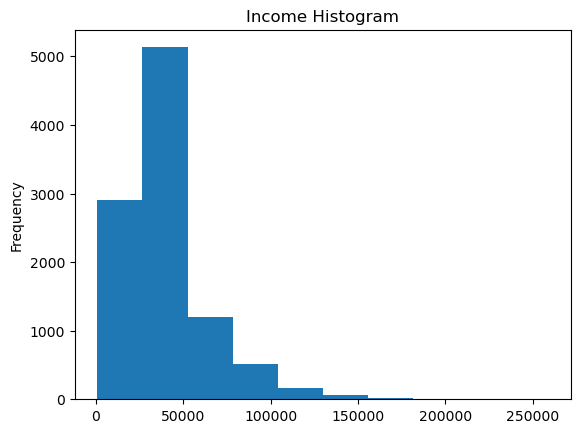

In [43]:
#Boxplot to identify outliers in income
df['income'].plot.hist()
plt.title("Income Histogram")

In [44]:
# Standardizing the income variable
df['income_z'] = stats.zscore(df['income'])

In [45]:
# Identifying outliers using the query function
income_outliers = df.query('income_z > 3 | income_z < -3')

In [46]:
# Sorting the data in income_outliers by income_z variable
income_outliers_sort = income_outliers.sort_values(['income_z'], ascending = False)

In [47]:
# List out the outliers
income_outliers_sort['income'].head(n=15)

4249    258900
9180    256998
5801    212255
6837    194550
3985    189938
8830    186156
972     186035
2762    175137
9249    173978
656     172884
3782    172372
688     168097
6130    167846
3953    166553
1725    165151
Name: income, dtype: int32

Text(0.5, 1.0, 'Population Histogram')

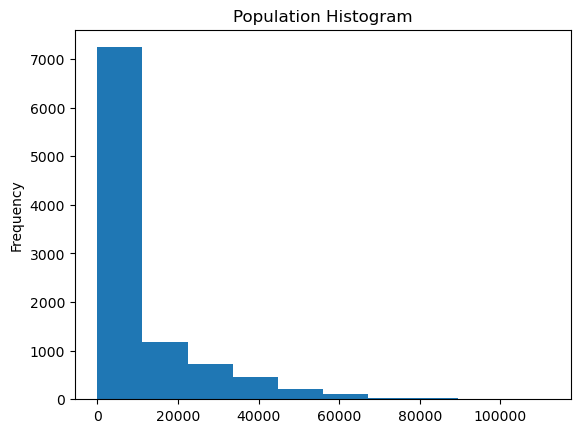

In [48]:
#Boxplot to identify outliers in population
df['population'].plot.hist()
plt.title("Population Histogram")

In [49]:
# Standardizing the population variable
df['population_z'] = stats.zscore(df['population'])

In [50]:
# Identifying outliers using the query function
population_outliers = df.query('population_z > 3 | population_z < -3')

In [51]:
# Sorting the data in income_outliers by income_z variable
population_outliers_sort = population_outliers.sort_values(['population_z'], ascending = False)

In [52]:
# List out the outliers
population_outliers_sort['population'].head(n=15)

8139    111850
8320    103732
6288    102433
1775     98660
6610     96575
8130     96436
7441     94512
2402     94512
1893     94395
4349     90675
203      90517
1398     89075
442      88349
5898     88344
9987     87509
Name: population, dtype: int64

In [53]:
#Detecting total count of null values in tenure column.
df['tenure'].isnull().sum()

931

In [54]:
#Filling blanks in tenure column with median.
tenure_median = round(df['tenure'].median())
df['tenure'].fillna(tenure_median, inplace = True)
df['tenure'] = df['tenure'].astype(int)

#checking count of values for tenure
df.tenure.value_counts()

36    947
2     380
4     339
7     325
3     325
     ... 
31      4
30      4
32      4
33      2
34      2
Name: tenure, Length: 70, dtype: int64

Text(0.5, 1.0, 'Tenure Histogram')

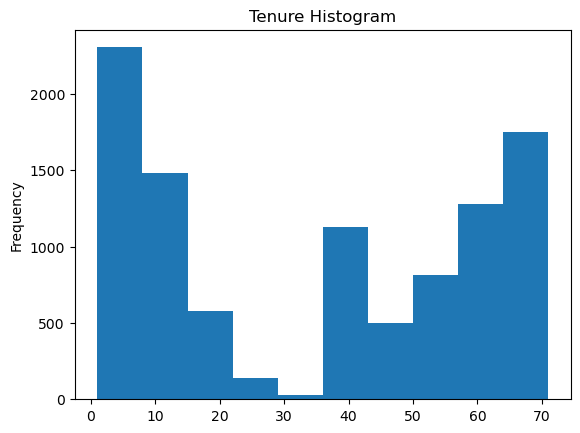

In [55]:
df['tenure'].plot.hist()
plt.title("Tenure Histogram")

In [56]:
#Detecting total count of null values in bandwidth column.
df['bandwidth_gb_year'].isnull().sum()

1021

In [57]:
#Filling blanks in bandwith column with median values
band_median = round(df['bandwidth_gb_year'].median())
df['bandwidth_gb_year'].fillna(band_median, inplace = True)
df['bandwidth_gb_year'] = df['bandwidth_gb_year'].astype('int')
df['bandwidth_gb_year'] = df['bandwidth_gb_year'].round(0)

#checking count of values for age
df.bandwidth_gb_year.value_counts()

3382    1022
6273       9
991        9
704        9
877        9
        ... 
4538       1
2744       1
6030       1
1980       1
5001       1
Name: bandwidth_gb_year, Length: 4181, dtype: int64

In [58]:
#replacing negative values in outage_per_week using abs
df['outage_sec_perweek'] = df['outage_sec_perweek'].abs()

#Rounding outage_per_week 2 decimal places
df['outage_sec_perweek'] = df['outage_sec_perweek'].round(0)

In [59]:
#Rounding Monthly Charge 2 decimal places
df['monthly_charge'] = df['monthly_charge'].round(2)

In [60]:
#Changing the following to string data type.
df_string = ['zip','lat','lng'] 
df[df_string] = df[df_string].astype("str")

In [61]:
#Changing the following to category data type.
df_cat = ['area','education','employment_type','marital_type',
          'timezone','gender','payment_method','timely_response','timely_fixes',
          'timely_replacements','reliability','options','respectful_response'
          ,'courteous_exchange','active_listening'] 
df[df_cat] = df[df_cat].astype("category")

In [62]:
#loading zip code into dataframe using string
df['zip'] = df['zip'].astype('str').str.zfill(5)

In [63]:
# Verifying all the na values have been replaced 
df.isnull().any()

case_order              False
customer_id             False
interaction             False
city                    False
state                   False
county                  False
zip                     False
lat                     False
lng                     False
population              False
area                    False
timezone                False
job                     False
children                False
age                     False
education               False
employment_type         False
income                  False
marital_type            False
gender                  False
churn                   False
outage_sec_perweek      False
email                   False
contacts                False
yearly_equip_failure    False
techie                  False
contract                False
port_modem              False
tablet                  False
internet_service        False
phone                   False
multiple_lines          False
online_security         False
online_bac

In [64]:
#Verifying data types have been changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   case_order            10000 non-null  int64   
 1   customer_id           10000 non-null  object  
 2   interaction           10000 non-null  object  
 3   city                  10000 non-null  object  
 4   state                 10000 non-null  object  
 5   county                10000 non-null  object  
 6   zip                   10000 non-null  object  
 7   lat                   10000 non-null  object  
 8   lng                   10000 non-null  object  
 9   population            10000 non-null  int64   
 10  area                  10000 non-null  category
 11  timezone              10000 non-null  category
 12  job                   10000 non-null  object  
 13  children              10000 non-null  float64 
 14  age                   10000 non-null  Int64   
 15  edu

In [65]:
# Dropping the 'Z score columns column'
df = df.drop(columns=['income_z','population_z'])

# Confirm the column was removed 
print(df.shape)

(10000, 51)


######  Provide a copy of clean dataset (D5)

In [66]:
#Saving cleaned dataset to CSV
df.to_csv('output.csv', index = False)

# Summarize limitations of data cleaning 

- (D1) & (D3)
   - 1. I was able to change `Zip`, `Lat`, and `Lng` from float to string. I did this because these are identifiers of geographical location. 
   - 2. I replaced the negative values in `Outage_sec_perweek` with postive values using the `abs` function.
   - 3. I replaced all numeric columns that had missing data with median values, excluding `Children` which was replaced with 0.
   - 4. I dropped the `Unamed: 0` column and made `CaseOrder` the new index.
   - 5. I rexpressed values in `Timezone`, `Education`, `Marital`, `PaymentMethod` and `Gender` to make them more concise.
   - 6. For categorical columns I replaced null values with "No".
   - 7. I renamed survey item1 - item8 to provide a description of the column.
   - 8. I renamed columns to match python casing standards.
   - 9. I changed datatypes of certain columns to better provide insights of data inside column.
   - 10. I rounded a few columns in order to make the data more consistent and presentable. 
   
- (D2)
   - 1. `Children` is a field we rely on the customer to provide, I felt more comfortable replacing the values with 0 instead of using a median value as this could skew our dataset.
   - 2. `Phone` and `TechSupport` these should be fields that we should be able to pull with in-house data the fact that we have null values warrants a review of our internal data collection processes.
   - 3. `Techie` is another value that we rely on customer to provide, for the purposes of our data-cleaning I dont find it to be a relevant column, however making this a required field in order to register for services would help us with being able to ensure we dont have any null values.
   - 4. `Age`, `Income`, `Tenure`, and `Bandwidth_GB_Year` null values were replaced using the median value for each column respectively.
   
- (D6) & (D7)
  - 1. The data set was incomplete due to missing values in certain columns, for categorical filling null values with "No" can introduce bias and lead to conclusions that are not accurate. For quantitative fields filling data with median values can also skew data for example the median I filled null values with in the `Age` and created more than 2,500 entries for the age of 53. I could have randomized the results but that could also inflate the results and lead to inaccurate representaions. 
   






# PCA

In [67]:
# Loading in fresh data frame
df = pd.read_csv('./churn_raw_data.csv')

In [68]:
df.shape

(10000, 52)

In [69]:
#renaming columns to python casing.
col_head = {
    'CaseOrder': 'case_order',
    'Customer_id': 'customer_id',
    'Interaction': 'interaction',
    'City': 'city',
    'State': 'state',
    'County': 'county',
    'Zip': 'zip',
    'Lat': 'lat',
    'Lng': 'lng',
    'Population': 'population',  
    'Area': 'area',  
    'Timezone': 'timezone',
    'Job': 'job',
    'Children': 'children',
    'Age': 'age', 
    'Education': 'education',
    'Employment': 'employment_type',
    'Income': 'income',  
    'Marital': 'marital_type',
    'Gender': 'gender',
    'Churn': 'churn',
    'Outage_sec_perweek': 'outage_sec_perweek',
    'Email': 'email',
    'Contacts': 'contacts',
    'Yearly_equip_failure': 'yearly_equip_failure',
    'Techie': 'techie',
    'Contract': 'contract',
    'Port_modem': 'port_modem',
    'Tablet': 'tablet',
    'InternetService': 'internet_service',
    'Phone': 'phone',
    'Multiple': 'multiple_lines',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'Tenure': 'tenure',
    'MonthlyCharge': 'monthly_charge',
    'Bandwidth_GB_Year': 'bandwidth_gb_year',
    'item1': 'timely_response',
    'item2': 'timely_fixes',
    'item3': 'timely_replacements',
    'item4': 'reliability',
    'item5': 'options',
    'item6': 'respectful_response',
    'item7': 'courteous_exchange',
    'item8': 'active_listening'}

df.rename(columns=col_head, inplace=True)

In [70]:
df_pca = df[['timely_response', 'timely_fixes', 'timely_replacements', 'reliability','options','respectful_response',
                         'courteous_exchange','active_listening']]

#### (E1)

In [71]:
#Normalize columns
df_pca_norm = (df_pca-df_pca.mean())/df_pca.std()

In [72]:
# Setting size of PCA analysis (Component Extraction)
pca= PCA(n_components=df_pca.shape[1])

In [73]:
# Transformation and normalization of PCA
pca.fit(df_pca_norm)

PCA(n_components=8)

In [74]:
# dataframe for PCA
pca_load = pd.DataFrame(pca.components_.T, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'],
index=df_pca_norm.columns)

In [75]:
pca_load

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
timely_response,0.459030,0.282717,-0.069221,0.120013,-0.044752,0.025032,-0.241688,0.793174
timely_fixes,0.434342,0.285321,-0.106259,0.170235,-0.064900,0.074672,-0.591586,-0.574375
timely_replacements,0.400775,0.282950,-0.173885,0.254689,-0.148134,-0.396761,0.673403,-0.177149
reliability,0.145686,-0.569898,-0.171525,0.482754,-0.444692,0.431115,0.086961,0.018610
options,-0.175385,0.591292,0.135315,-0.060906,-0.211030,0.693537,0.265272,-0.041198
respectful_response,0.405197,-0.183897,-0.061988,-0.063712,0.757170,0.403694,0.231751,-0.064123
courteous_exchange,0.358413,-0.181067,-0.184917,-0.806749,-0.378391,0.067449,0.066043,-0.040309
active_listening,0.308851,-0.132624,0.931619,0.009229,-0.114326,-0.044789,0.046267,-0.042500


#### (E2)

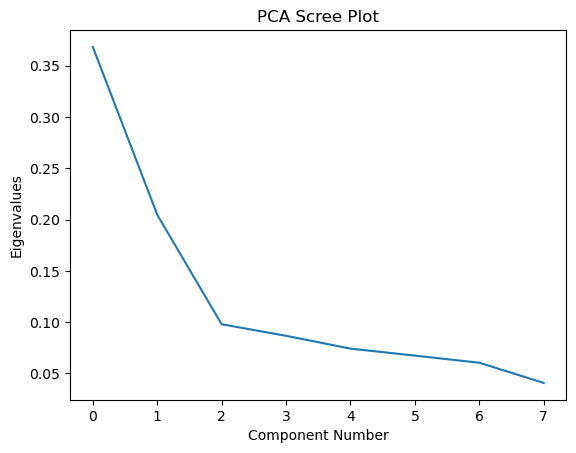

In [76]:
#Eigenvalues
covar_matrix = np.dot(df_pca_norm.T, df_pca_norm) / df_pca.shape[0]
eigen_value = [np.dot(eigenvector.T, np.dot(covar_matrix, eigenvector)) for eigenvector in pca.components_]

#Scree plot of PCA Variance
plt.plot(pca.explained_variance_ratio_)
plt.title('PCA Scree Plot')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalues')
plt.show()

In [77]:
eigen_value

[2.946624898079923,
 1.637311953352506,
 0.7829313007128909,
 0.6928723732024508,
 0.5928829027996161,
 0.5384265805200892,
 0.48278643893429757,
 0.3253635523983389]

# PCA (E)

- The first principal component in the loading plot has positive association with `timely_response`, `timely_fixes`,`timely_replacements`, and `repectful_response`.  The second principal component has a negative association with reliability. 

- The first two principal components have eigenvalues > 1 and should be kept.

# (E3) 

- One benefit associated with PCA is that it can assist with identifying factors that contribute to a particular outcome. Such as for the telecom churn file using the survey data as I did the insights provided can be used to create targeted campaigns to improve customer experiences such as adressing painpoints like `reliablity`.
 

# Panopto Recording (F)

- Link to video: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=49110ed1-9143-4200-8b04-b0a6017b191c
- Link to revision 1: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=784339a8-1d3b-4579-aed9-b0a900025511

## Code References (G)

- Nik. (2021, December 7). How to Calculate a Z-Score in Python (4 Ways) • datagy. Datagy. https://datagy.io/python-z-score/

- Python - Loading Zip Codes into a DataFrame as Strings? (n.d.). Stack Overflow. Retrieved October 24, 2023, from https://stackoverflow.com/questions/33137686/python-loading-zip-codes-into-a-dataframe-as-strings

- Replace NaN Values with Zeros in Pandas DataFrame. (2020, July 1). GeeksforGeeks. https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/#

- Zach. (2021, December 16). How to Find Duplicates in Pandas DataFrame (With Examples). Statology. https://www.statology.org/pandas-find-duplicates/

- Six Types of Marital Status | LawDepot - LawDepot.com. (n.d.). LawDepot. https://www.lawdepot.com/resources/family-articles/marital-status/

- Arora, L. (2020, February 14). How to use loc and iloc for Selecting Data in Pandas (with Python code!). Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/02/loc-iloc-pandas/

- Replace missing value with N/A for multiple columns at the same time. (n.d.). Stack Overflow. Retrieved October 24, 2023, from https://stackoverflow.com/questions/49987853/replace-missing-value-with-n-a-for-multiple-columns-at-the-same-time

- Interpret the key results for Principal Components Analysis. (n.d.). Support.minitab.com. https://support.minitab.com/en-us/minitab/21/help-and-how-to/statistical-modeling/multivariate/how-to/principal-components/interpret-the-results/key-results/


## Source References (H)

- Chantal D. Larose, & Daniel T. Larose. (2019). Data Science Using Python and R. Wiley.